# Exercise
Dataset: https://www.kaggle.com/giripujar/hr-analytics
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("HR_comma_sep.csv")

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Exploratory data analysis (EDA)

In [3]:
left = df[df.left==1]

left.shape

(3571, 10)

In [4]:
retained = df[df.left==0]

retained.shape

(11428, 10)

retained (didn't left) has 11428 employees which is more than those who's left i.e., 3571

### Average of employees who are left (1) and who isn't (0)

In [5]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


We have observed three things from the above:
- **Satisfaction Level:** Satisfaction level seems to be low 0.44 (**44%**) in employees who left **VS** those who stayed 0.66 (**66%**).
- **Average Monthly Hours:** Average monthly hours are higher in employees leaving the firm **207**
- **Promotion Last 5 Years:** Employees who are given promotion are likely to be retained at firm i.e., **0.02** (high) and **0.005** (low)

### Bar chart

<Axes: xlabel='salary'>

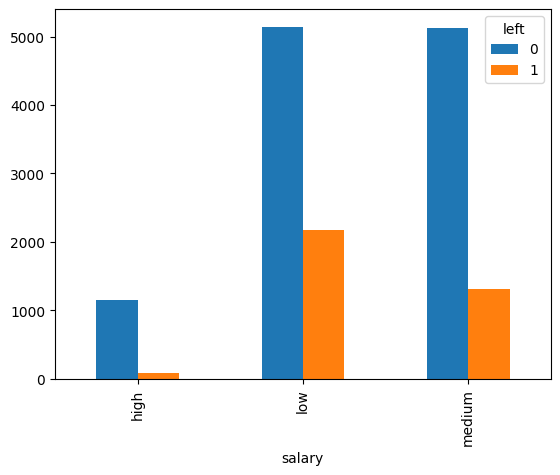

In [6]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with **high** salaries are likely to not leave the company

### From the data analysis so far we can conclude that we will use following in our model:
- **Satisfaction Level**
- **Average Monthly Hours**
- **Promotion Last 5 Years**
- **Salary**

In [7]:
final_df = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]

final_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


### OneHotEncoding -> Pandas get dummies

In [8]:
dummies = pd.get_dummies(final_df.salary, prefix='salary')

dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [9]:
merged_df = pd.concat([final_df, dummies], axis='columns')

merged_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [10]:
merged_df.drop('salary', axis='columns', inplace=True)

merged_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [11]:
X = merged_df

X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [12]:
y = df.left

y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [40]:
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
model.score(X_test, y_test)

0.7757777777777778